In [1]:
#Import Dependencies
from pylab import *
import os
import pandas as pd
import librosa
import librosa.display

In [26]:
# load file
input_file = ('../data/test_audio/cf5f15e1-637b-477f-8132-90eeeec48f50.wav')

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2594413e-05
 -6.1681232e-05 -4.2787357e-05] 22050


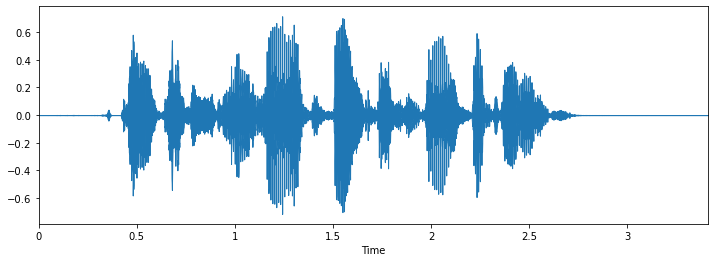

In [27]:
data, sampling_rate = librosa.load(input_file)
plt.figure(figsize=(12, 4))

print(data, sampling_rate)
librosa.display.waveplot(data, sr=sampling_rate)

In [28]:
def input_parser(input_file):
   # handle exception to check if there isn't a file which is corrupted
   try:
      # extraction
      X, sample_rate = librosa.load(input_file, res_type='kaiser_fast') 
      # extract mfcc data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=128).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", input_file)
      return None
 
   feature = mfccs.tolist()
    
   return feature


In [29]:
value = input_parser(input_file)
value

[-363.0564270019531,
 114.6954345703125,
 -9.377296447753906,
 20.188011169433594,
 -2.26130747795105,
 17.263427734375,
 -3.885132312774658,
 4.6348958015441895,
 -5.418772220611572,
 2.9864296913146973,
 2.728952407836914,
 -15.254379272460938,
 1.5108699798583984,
 5.596846103668213,
 2.148738145828247,
 -6.590315341949463,
 -7.7309465408325195,
 -6.84821891784668,
 -4.578629970550537,
 -8.62121868133545,
 -16.320140838623047,
 -6.513715744018555,
 -7.286199569702148,
 -11.562156677246094,
 1.0416886806488037,
 2.80849289894104,
 -10.060576438903809,
 2.683070659637451,
 -2.85748028755188,
 -9.352621078491211,
 -1.5102344751358032,
 -6.844049453735352,
 -0.8203824758529663,
 -6.125183582305908,
 1.4743553400039673,
 -1.1869289875030518,
 -5.425834655761719,
 -0.011779681779444218,
 -5.710196018218994,
 -5.895796298980713,
 -3.5314066410064697,
 -3.291484832763672,
 -5.323756217956543,
 -3.4854085445404053,
 -1.0684995651245117,
 0.12684479355812073,
 -5.168277263641357,
 -2.13897919

In [30]:
arr = np.array(value)
arr2d = np.reshape(arr, (1,128))



In [31]:
from joblib import load
model = load('../models/rf_model.sav')

In [32]:
model.predict(arr2d)

array(['calm'], dtype=object)

In [33]:
def model_test(input_value):
    model = load('../models/rf_model.sav')
    feature = input_parser(input_file)
    arr = np.array(feature)
    arr2d = np.reshape(arr, (1,128))
    result = model.predict(arr2d)
    
    return result

In [34]:
model_test(value)

array(['calm'], dtype=object)